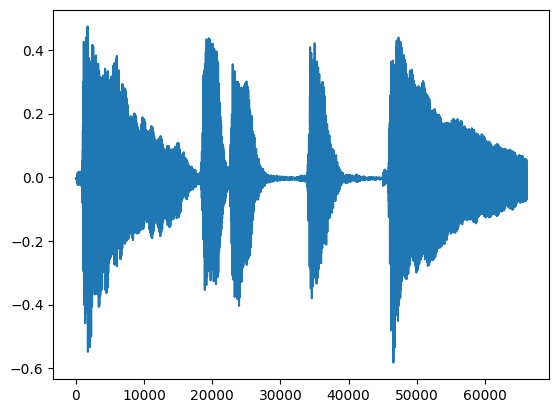

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 读取音频文件
y,sr = librosa.load(path = './piano.wav',sr = 22050, mono = False,offset= 0,duration=3)
plt.plot(y)
plt.show()

In [2]:
# 获取持续时长
d = librosa.get_duration(y = y,sr = sr,n_fft = 2048)
d

3.0

In [3]:
# 获取音频文件的采样率
sr = librosa.get_samplerate('./piano.wav')
sr

44100

In [4]:
# 写入音频
import soundfile as sf
sf.write('piano2.wav',y,sr)

In [5]:
# 过零率
import  librosa.feature as lf
zcr = lf.zero_crossing_rate(y,frame_length=  1024, hop_length = 512, center=True)
zcr


array([[0.01660156, 0.05175781, 0.08789062, 0.14257812, 0.15332031,
        0.13769531, 0.15625   , 0.14160156, 0.11816406, 0.11914062,
        0.11523438, 0.11230469, 0.10449219, 0.09765625, 0.1015625 ,
        0.109375  , 0.10839844, 0.10058594, 0.10253906, 0.09667969,
        0.08203125, 0.07617188, 0.08886719, 0.10058594, 0.09570312,
        0.09765625, 0.09179688, 0.08886719, 0.09472656, 0.09765625,
        0.08984375, 0.0625    , 0.03613281, 0.03222656, 0.04003906,
        0.05175781, 0.06835938, 0.06152344, 0.04882812, 0.04101562,
        0.03125   , 0.03808594, 0.05371094, 0.0625    , 0.08691406,
        0.09863281, 0.08496094, 0.0859375 , 0.0859375 , 0.08203125,
        0.0625    , 0.06054688, 0.07226562, 0.07519531, 0.07226562,
        0.05957031, 0.0546875 , 0.046875  , 0.03515625, 0.0234375 ,
        0.01367188, 0.00390625, 0.        , 0.00195312, 0.01953125,
        0.02636719, 0.06445312, 0.07519531, 0.046875  , 0.06542969,
        0.06933594, 0.06445312, 0.06152344, 0.05

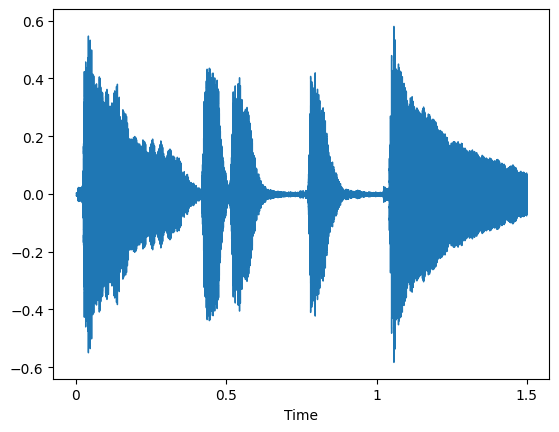

In [6]:
# 波形图
from librosa import  display as ld

ld.waveshow(y = y,sr = sr ,axis='time',offset= 0.0)

In [7]:
# 短时傅里叶变换
D = librosa.stft(y = y,n_fft=2048,hop_length= None,win_length = None,window='hann',center = True,pad_mode='reflect')

D

array([[-3.90012002e+00+0.0000000e+00j, -3.75515866e+00+0.0000000e+00j,
        -3.67696071e+00+0.0000000e+00j, ...,
        -3.66805029e+00+0.0000000e+00j, -4.06590271e+00+0.0000000e+00j,
        -4.75620174e+00+0.0000000e+00j],
       [ 2.11560082e+00+8.5760392e-17j,  1.75184524e+00+1.4019650e-01j,
         1.97913659e+00-7.8718409e-02j, ...,
         1.83328748e+00-6.8143597e-03j,  1.73818016e+00-3.7318861e-01j,
         2.85161757e+00-3.2009238e-01j],
       [ 5.03347330e-02+1.6189149e-17j,  2.08780572e-01-4.4679755e-01j,
        -4.35310572e-01+2.5880513e-01j, ...,
        -5.29145217e-03+1.3901585e-03j,  3.15938145e-01-1.8712462e-01j,
        -8.24518740e-01+5.6807268e-01j],
       ...,
       [ 3.30725894e-03-2.2965412e-17j, -1.65302958e-03+3.0029230e-07j,
         1.49889559e-07+7.3426793e-07j, ...,
        -2.42192016e-07-1.1327454e-07j,  2.92251725e-03+2.0884669e-03j,
        -8.21407139e-03-5.8616498e-03j],
       [-3.30880727e-03+1.3986208e-17j,  1.02961155e-06+1.6540416e-0

In [8]:
# 短时傅里叶逆变换
y = librosa.istft(D)
y

array([-0.00311977, -0.00469161, -0.00391595, ..., -0.06205089,
       -0.06213   , -0.05769163], dtype=float32)

In [9]:
# 幅度转DB
librosa.core.amplitude_to_db(y,ref = 1.0)


array([-50.11754 , -46.573566, -48.143253, ..., -24.14504 , -24.133972,
       -24.777744], dtype=float32)

In [10]:
# 功率转 DB
librosa.core.power_to_db(y,ref = 1.0)

array([-83.24536, -83.24536, -83.24536, ..., -83.24536, -83.24536,
       -83.24536], dtype=float32)

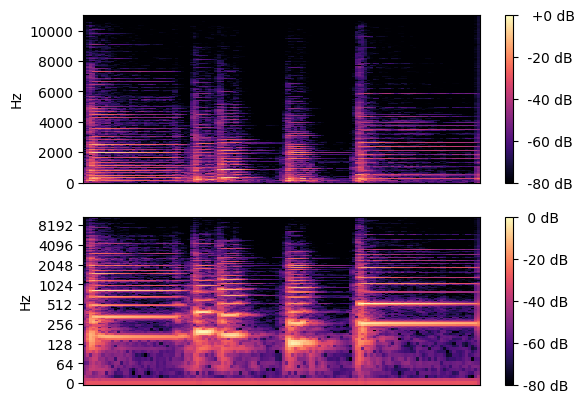

In [11]:
# 语谱图
# 窗长长大，则是窄带频谱图
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref = np.max)
plt.subplot(2,1,1)
librosa.display.specshow(D,y_axis='linear')
plt.colorbar(format='%+4.0f dB')
plt.title = 'Linear-frequency power spectrogram'

plt.subplot(2,1,2)
librosa.display.specshow(D,y_axis='log')
plt.colorbar(format= '%2.0f dB')
plt.title='Log-frequency power spectogram'
plt.show()

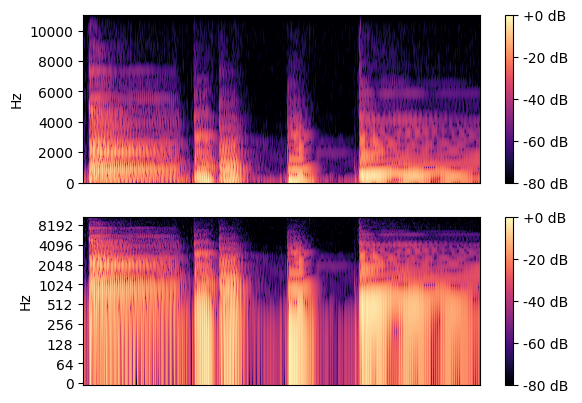

In [12]:
#窗长减小，则是宽带语谱图
D = librosa.amplitude_to_db(np.abs(librosa.stft(y,win_length=64)),ref = np.max)
plt.subplot(2,1,1)
librosa.display.specshow(D,y_axis='linear')
plt.colorbar(format = '%+2.0f dB ')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(2,1,2)
librosa.display.specshow(D,y_axis='log')
plt.colorbar(format = '%+2.0f dB')
#plt.title('log-frequency power spectrogram')
plt.show()

C:\Users\25083\AppData\Local\Temp\ipykernel_14200\4157484114.py:2: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  melfb = librosa.filters.mel(sr = 22050,n_fft =2048, n_mels = 2048)


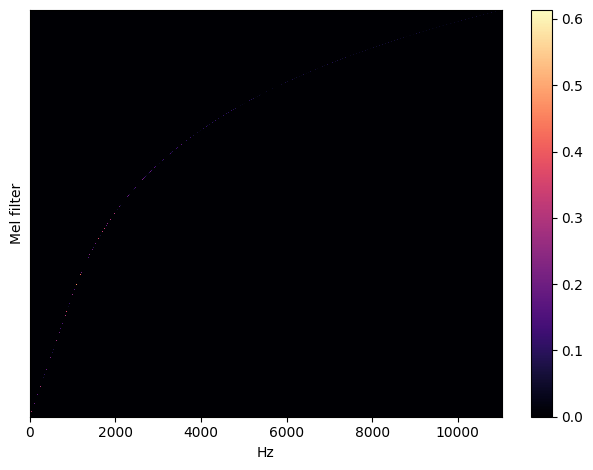

In [13]:
# mel 滤波器组
melfb = librosa.filters.mel(sr = 22050,n_fft =2048, n_mels = 2048)
plt.figure()
librosa.display.specshow(melfb,x_axis='linear')
plt.ylabel('Mel filter')

plt.colorbar()
plt.tight_layout()
plt.show()

In [14]:
#计算Mel scaled 频谱
# 方法一 使用时间序列求Mel频谱

y , sr = librosa.load(path='./piano.wav')
print(librosa.feature.melspectrogram(y =y,sr = sr))

[[7.78459907e-02 9.54266861e-02 1.24178812e-01 ... 6.44435361e-02
  6.53329268e-02 7.24320188e-02]
 [8.43974389e-03 2.79423464e-02 1.24527372e-01 ... 2.65892893e-02
  3.57401446e-02 9.91440751e-03]
 [8.60452931e-03 1.04084976e-01 1.45117491e-01 ... 3.99481244e-02
  2.54738852e-02 5.46379201e-03]
 ...
 [1.27689430e-06 7.94153602e-05 5.45161427e-04 ... 2.12197779e-06
  2.65570861e-06 1.77941297e-06]
 [1.22903236e-06 3.56861929e-05 2.58344779e-04 ... 1.15963053e-06
  1.31524905e-06 1.21770893e-06]
 [7.31125525e-08 3.57186263e-06 1.44053256e-05 ... 6.17864586e-08
  9.91835307e-08 3.27995366e-07]]


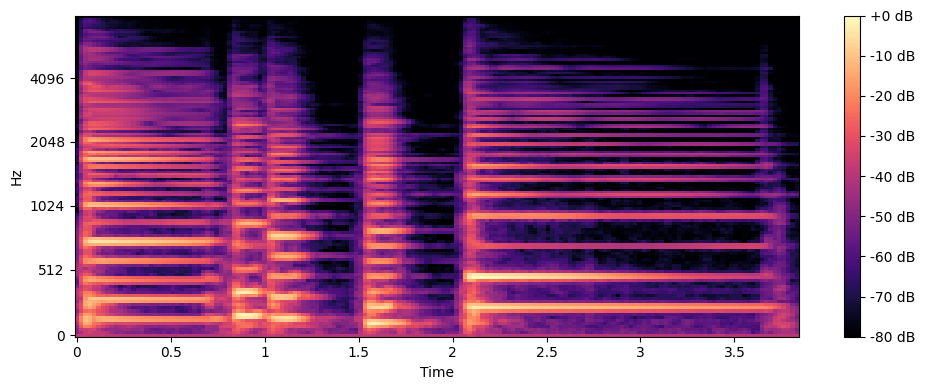

In [15]:
# 方法二 使用stft频谱求Mel频谱
D = np.abs(librosa.stft(y)) ** 2
S = librosa.feature.melspectrogram(S = D) # 使用stft频谱求Mel频谱

plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.core.power_to_db(S,ref = np.max),
                         y_axis='mel',fmax = 8000,x_axis='time')
plt.colorbar(format = '% +2.0f dB')
plt.tight_layout()
plt.show()

In [16]:
# 提取 Log-Mel Spectrogram 特征
melspec = librosa.feature.melspectrogram(y = y,sr = sr,n_fft = 1024,hop_length=512,n_mels = 128)
logmelspec = librosa.amplitude_to_db(melspec)
print(logmelspec.shape)

(128, 166)


In [17]:
# 提取MFCC系数
mfccs = librosa.feature.mfcc(y = y, sr =sr , n_mfcc = 40)
mfccs.shape

(40, 166)